#題目: 將已整理好的文件以機器學習方式分辨是否為垃圾郵件
說明：輸入文件已處理過，為一D乘V(V=48)+1矩陣，D代表電郵數，V代表選出來(判斷是否垃圾)的字(特徵)，所以我們是用48個特徵來判斷。列中每行表達的特徵值(feature)= 出現次數 / 該電郵總字數 * 100，最後一行是標註(Label)是否為垃圾郵件。請用ML方法開發出垃圾郵件偵測器並算出預測準確度

延伸:可用不同ML分類法，可準備自己的垃圾郵件做預處理。

範例程式檔名: spam_nb_垃圾郵件偵測器.py，以Naïve Bayes方式完成

模組: sklearn, pandas, numpy

輸入檔：spambase.data

成績：辨識百分率

In [30]:
from __future__ import print_function, division
from builtins import range

import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# 註: 理論上 multinomial NB 是針對出現次數 "counts", 但文件上說對出現比率 "word proportions"也適合

data = pd.read_csv('spambase.data').values 
data, data.shape
#data has ben pre-processed, with a dimension of D(num of emails) * V(Words that has been selected as features of spam emails)

(array([[2.100e-01, 2.800e-01, 5.000e-01, ..., 1.010e+02, 1.028e+03,
         1.000e+00],
        [6.000e-02, 0.000e+00, 7.100e-01, ..., 4.850e+02, 2.259e+03,
         1.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, ..., 4.000e+01, 1.910e+02,
         1.000e+00],
        ...,
        [3.000e-01, 0.000e+00, 3.000e-01, ..., 6.000e+00, 1.180e+02,
         0.000e+00],
        [9.600e-01, 0.000e+00, 0.000e+00, ..., 5.000e+00, 7.800e+01,
         0.000e+00],
        [0.000e+00, 0.000e+00, 6.500e-01, ..., 5.000e+00, 4.000e+01,
         0.000e+00]]), (4600, 58))

In [22]:
np.random.shuffle(data) # shuffle each row in-place, but preserve the row

X = data[:,:48]
Y = data[:,-1]

# 不一定用100列 作測試 100->80 試試
# here I used the train_test split function


Xtrain = X[:-80,]
Ytrain = Y[:-80,]
Xtest = X[-80:,]
Ytest = Y[-80:,]

# 我們在習題中，不用Naive Bayes
#from sklearn.naive_bayes import MultinomialNB
#model = MultinomialNB()
#model.fit(Xtrain, Ytrain)
#print("Classification rate for NB:", model.score(Xtest, Ytest))

# Decision Tree 的準確度如何？
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(Xtrain, Ytrain)
print("Classification rate for Decision Tree:", model.score(Xtest, Ytest))

##### 任何 model都行，以下試試 AdaBoost! #####
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(Xtrain, Ytrain)
print("Classification rate for AdaBoost:", model.score(Xtest, Ytest))

from sklearn.svm import SVC
svc = SVC()
svc.fit(Xtrain, Ytrain)
print("Classification rate for SVC: ", svc.score(Xtest, Ytest))

Classification rate for Decision Tree: 0.9
Classification rate for AdaBoost: 0.9375
Classification rate for SVC:  0.9125


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

paired = zip(names, classifiers) #zip together the classifiers to their individual names

for names, classifiers in paired:
  classifiers.fit(Xtrain,Ytrain)
  print("Classification accuracy for {}: {}".format(names, classifiers.score(Xtest,Ytest)))

Classification accuracy for Nearest Neighbors: 0.8625
Classification accuracy for Linear SVM: 0.8875
Classification accuracy for RBF SVM: 0.8375
Classification accuracy for Gaussian Process: 0.9375
Classification accuracy for Decision Tree: 0.875
Classification accuracy for Random Forest: 0.8125
Classification accuracy for Neural Net: 0.9125
Classification accuracy for AdaBoost: 0.9375
Classification accuracy for Naive Bayes: 0.7625
Classification accuracy for QDA: 0.775


# homework reference: [classifier comparison](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)

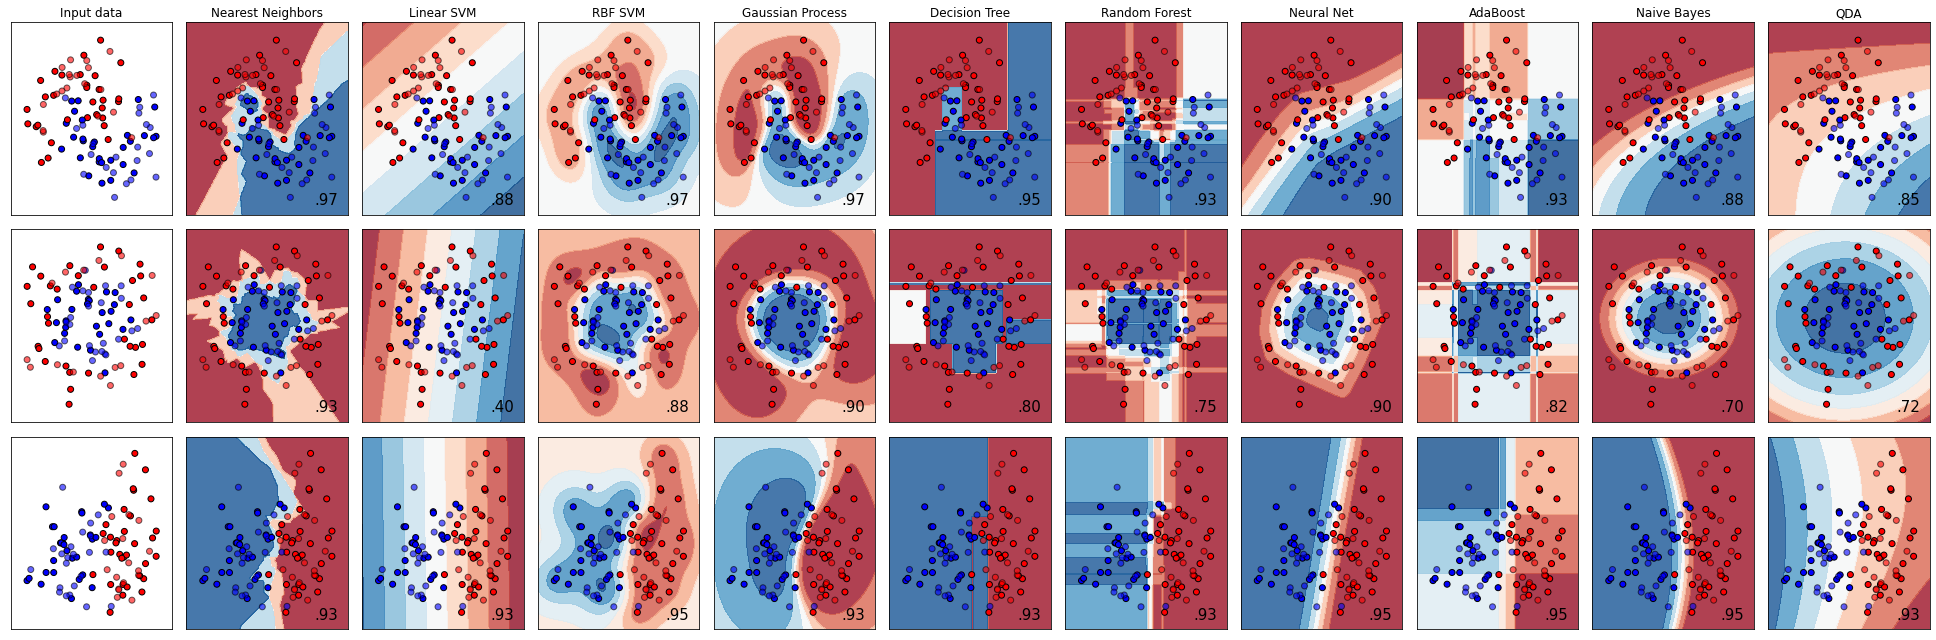

In [19]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

# generate dataset
datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()